# Linear Discriminant Analysis


In [1]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Importing dataset
dataset = pd.read_csv("Wine File.csv")
dataset


Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  Customer_Segment  
0     3.92     1065                 1  
1     3.40     1050                 1  
2     3.17     1185                 1  
3     3.45     1480                 1  
4     2.93      735                 1  
..     ...      ...               ...  
173   1.74      740                 3  
174   1.56      750                 3  
175   1.56      835                 3  
176   1.62      840                 3  
177   1.60      560                 3  

[178 rows x 14 columns]

In [6]:
X = dataset.iloc[: ,:-1]
X

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  
0     3.92     1065  
1     3.40     1050  
2     3.17     1185  
3     3.45     1480  
4     2.93      735  
..     ...      ...  
173   1.74      740  
174   1.56      750  
175   1.56      835  
176   1.62      840  
177   1.60      560  

[178 rows x 13 columns]

In [7]:
y = dataset.iloc[: , -1]
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Customer_Segment, Length: 178, dtype: int64

In [8]:
#spliting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
X_train

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
22     13.71        1.86  2.36          16.6        101           2.61   
146    13.88        5.04  2.23          20.0         80           0.98   
97     12.29        1.41  1.98          16.0         85           2.55   
69     12.21        1.19  1.75          16.8        151           1.85   
167    12.82        3.37  2.30          19.5         88           1.48   
..       ...         ...   ...           ...        ...            ...   
71     13.86        1.51  2.67          25.0         86           2.95   
106    12.25        1.73  2.12          19.0         80           1.65   
14     14.38        1.87  2.38          12.0        102           3.30   
92     12.69        1.53  2.26          20.7         80           1.38   
102    12.34        2.45  2.46          21.0         98           2.56   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
22         2.88                  0.27             1.69             3.80  1.11   
146        0.34                  0.40             0.68             4.90  0.58   
97         2.50                  0.29             1.77             2.90  1.23   
69         1.28                  0.14             2.50             2.85  1.28   
167        0.66                  0.40             0.97            10.26  0.72   
..          ...                   ...              ...              ...   ...   
71         2.86                  0.21             1.87             3.38  1.36   
106        2.03                  0.37             1.63             3.40  1.00   
14         3.64                  0.29             2.96             7.50  1.20   
92         1.46                  0.58             1.62             3.05  0.96   
102        2.11                  0.34             1.31             2.80  0.80   

     OD280  Proline  
22    4.00     1035  
146   1.33      415  
97    2.74      428  
69    3.07      718  
167   1.75      685  
..     ...      ...  
71    3.16      410  
106   3.17      510  
14    3.00     1547  
92    2.06      495  
102   3.38      438  

[119 rows x 13 columns]

In [10]:
y_train

22     1
146    3
97     2
69     2
167    3
      ..
71     2
106    2
14     1
92     2
102    2
Name: Customer_Segment, Length: 119, dtype: int64

In [11]:
X_test

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
19     13.64        3.10  2.56          15.2        116           2.70   
45     14.21        4.04  2.44          18.9        111           2.85   
140    12.93        2.81  2.70          21.0         96           1.54   
30     13.73        1.50  2.70          22.5        101           3.00   
67     12.37        1.17  1.92          19.6         78           2.11   
16     14.30        1.92  2.72          20.0        120           2.80   
119    12.00        3.43  2.00          19.0         87           2.00   
174    13.40        3.91  2.48          23.0        102           1.80   
109    11.61        1.35  2.70          20.0         94           2.74   
141    13.36        2.56  2.35          20.0         89           1.40   
24     13.50        1.81  2.61          20.0         96           2.53   
150    13.50        3.12  2.62          24.0        123           1.40   
41     13.41        3.84  2.12          18.8         90           2.45   
118    12.77        3.43  1.98          16.0         80           1.63   
15     13.63        1.81  2.70          17.2        112           2.85   
111    12.52        2.43  2.17          21.0         88           2.55   
113    11.41        0.74  2.50          21.0         88           2.48   
82     12.08        1.13  2.51          24.0         78           2.00   
9      13.86        1.35  2.27          16.0         98           2.98   
114    12.08        1.39  2.50          22.5         84           2.56   
18     14.19        1.59  2.48          16.5        108           3.30   
66     13.11        1.01  1.70          15.0         78           2.98   
60     12.33        1.10  2.28          16.0        101           2.05   
169    13.40        4.60  2.86          25.0        112           1.98   
171    12.77        2.39  2.28          19.5         86           1.39   
164    13.78        2.76  2.30          22.0         90           1.35   
117    12.42        1.61  2.19          22.5        108           2.00   
65     12.37        1.21  2.56          18.1         98           2.42   
90     12.08        1.83  2.32          18.5         81           1.60   
55     13.56        1.73  2.46          20.5        116           2.96   
29     14.02        1.68  2.21          16.0         96           2.65   
128    12.37        1.63  2.30          24.5         88           2.22   
145    13.16        3.57  2.15          21.0        102           1.50   
31     13.58        1.66  2.36          19.1        106           2.86   
12     13.75        1.73  2.41          16.0         89           2.60   
42     13.88        1.89  2.59          15.0        101           3.25   
158    14.34        1.68  2.70          25.0         98           2.80   
137    12.53        5.51  2.64          25.0         96           1.79   
98     12.37        1.07  2.10          18.5         88           3.52   
159    13.48        1.67  2.64          22.5         89           2.60   
38     13.07        1.50  2.10          15.5         98           2.40   
108    12.22        1.29  1.94          19.0         92           2.36   
85     12.67        0.98  2.24          18.0         99           2.20   
68     13.34        0.94  2.36          17.0        110           2.53   
143    13.62        4.95  2.35          20.0         92           2.00   
2      13.16        2.36  2.67          18.6        101           2.80   
100    12.08        2.08  1.70          17.5         97           2.23   
122    12.42        4.43  2.73          26.5        102           2.20   
154    12.58        1.29  2.10          20.0        103           1.48   
51     13.83        1.65  2.60          17.2         94           2.45   
76     13.03        0.90  1.71          16.0         86           1.95   
56     14.22        1.70  2.30          16.3        118           3.20   
26     13.39        1.77  2.62          16.1         93           2.85   
153    13

In [12]:
y_test

19     1
45     1
140    3
30     1
67     2
16     1
119    2
174    3
109    2
141    3
24     1
150    3
41     1
118    2
15     1
111    2
113    2
82     2
9      1
114    2
18     1
66     2
60     2
169    3
171    3
164    3
117    2
65     2
90     2
55     1
29     1
128    2
145    3
31     1
12     1
42     1
158    3
137    3
98     2
159    3
38     1
108    2
85     2
68     2
143    3
2      1
100    2
122    2
154    3
51     1
76     2
56     1
26     1
153    3
138    3
104    2
78     2
36     1
93     2
Name: Customer_Segment, dtype: int64

In [13]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
X_train

array([[ 0.87105392, -0.50160891, -0.04529965, ...,  0.65105132,
         1.92236422,  0.95776699],
       [ 1.07143396,  2.38098554, -0.53195636, ..., -1.59472678,
        -1.72764644, -1.06606301],
       [-0.80270878, -0.90952322, -1.46783465, ...,  1.15952938,
         0.19988728, -1.02362787],
       ...,
       [ 1.66078703, -0.49254415,  0.02957061, ...,  1.03240987,
         0.55531903,  2.62905886],
       [-0.33122633, -0.80074607, -0.41965097, ...,  0.01545374,
        -0.72970345, -0.80492366],
       [-0.74377347,  0.03321207,  0.32905166, ..., -0.662517  ,
         1.0747962 , -0.99098545]])

In [15]:
X_test

array([[ 0.78854449,  0.62242163,  0.70340297, -1.25353621,  1.00259103,
         0.63877541,  0.99961517, -1.53185436,  0.12366234,  0.03411669,
         0.01545374,  1.0474553 ,  0.33756102],
       [ 1.46040698,  1.4745093 ,  0.2541814 , -0.19396241,  0.67154682,
         0.86600022,  0.62554534, -0.50553184, -0.58783362,  0.09790839,
        -0.3659048 ,  1.00644394,  1.10465787],
       [-0.04833686,  0.35954352,  1.22749481,  0.40741732, -0.3215858 ,
        -1.1184298 , -1.49090236,  1.31026953, -1.45551161, -0.19371082,
        -0.78963652, -0.38794215, -0.46217826],
       [ 0.89462804, -0.82794036,  1.22749481,  0.83697426,  0.00945841,
         1.09322503,  1.21618191, -0.58447973,  1.37311866,  0.3075097 ,
         0.99003669,  0.15887592,  1.77382747],
       [-0.70841229, -1.12707752, -1.69244543,  0.0064975 , -1.51334494,
        -0.25497552, -0.01431094, -0.7423755 , -0.95225837, -0.15725842,
         0.69342449,  1.21150072, -0.75596003],
       [ 1.56649054, -0.447220

In [16]:
#Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [17]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [18]:
y_test

19     1
45     1
140    3
30     1
67     2
16     1
119    2
174    3
109    2
141    3
24     1
150    3
41     1
118    2
15     1
111    2
113    2
82     2
9      1
114    2
18     1
66     2
60     2
169    3
171    3
164    3
117    2
65     2
90     2
55     1
29     1
128    2
145    3
31     1
12     1
42     1
158    3
137    3
98     2
159    3
38     1
108    2
85     2
68     2
143    3
2      1
100    2
122    2
154    3
51     1
76     2
56     1
26     1
153    3
138    3
104    2
78     2
36     1
93     2
Name: Customer_Segment, dtype: int64

In [19]:
y_pred

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1, 3, 3, 2, 3, 1, 2, 2, 1,
       3, 1, 2, 2, 3, 1, 2, 1, 1, 3, 3, 2, 2, 1, 2], dtype=int64)

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[20,  0,  0],
       [ 1, 23,  0],
       [ 0,  0, 15]], dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9830508474576272

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


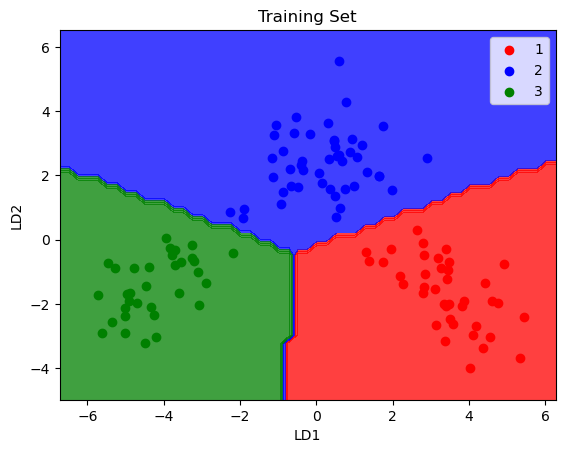

In [22]:
#Visualizing training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(
    np.arange(start = X_set[: , 0].min()-1 , stop = X_set[: , 0].max() +1 , step = 0.25),
    np.arange(start = X_set[: , 1].min()-1 , stop = X_set[: , 1].max() +1 , step = 0.25),
    )
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel() , X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red' ,'blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j,1],
               c = ListedColormap(('red', 'blue', 'green'))(i), label = j)
    
plt.title("Training Set")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend()
plt.show()

In [23]:
#Visualizing test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(
    np.arange(start = X_set[: , 0].min()-1 , stop = X_set[: , 0].max() +1 , step = 0.25),
    np.arange(start = X_set[: , 1].min()-1 , stop = X_set[: , 1].max() +1 , step = 0.25),
    )
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel() , X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red' ,'blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j,1],
               c = ListedColormap(('red', 'blue', 'green'))(i), label = j)
    
plt.title("Test Set")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
